<a href="https://colab.research.google.com/github/Abdelrhman2022/Abdelrhman2022/blob/main/ObesityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Review These
Overview on Decision Trees: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

More on Encoding: https://pbpython.com/categorical-encoding.html

In [ ]:
from sklearn import tree
import pandas as pd
import numpy as np


In [ ]:
# Run this cell to download the dataset
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip"
!unzip "/content/ObesityDataSet_raw_and_data_sinthetic (2).zip" 

--2022-02-12 19:11:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119205 (116K) [application/x-httpd-php]
Saving to: ‘ObesityDataSet_raw_and_data_sinthetic (2).zip’

ObesityDataSet_raw_ 100%[===================>] 116.41K   607KB/s    in 0.2s    

2022-02-12 19:11:37 (607 KB/s) - ‘ObesityDataSet_raw_and_data_sinthetic (2).zip’ saved [119205/119205]

Archive:  /content/ObesityDataSet_raw_and_data_sinthetic (2).zip
  inflating: ObesityDataSet_raw_and_data_sinthetic.arff  
  inflating: ObesityDataSet_raw_and_data_sinthetic.csv  


In [ ]:
#import dataset as a pandas dataframe - name it df - using the .read_csv method
dataset = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
#view first 5 rows of the dataset using the .head() method
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#check for the total amount of null values in each column using the .isnull() method
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Number of Columns

In [ ]:
df.shape[1]

17

Are there any new features that could be derived from our old features?


In [ ]:
#create a function that takes your df as an input then calculates the BMI using the equation: BMI= Weight/ Height**2
df['BMI']=df['Weight']/(df['Height'])**2

In [ ]:
# apply the function to every row in the dataframe, create a new column, 'BMI' that contains those values. HINT: You can use .apply and lambda
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
#check your dataframe

Drop old features, i.e: height and weight

In [ ]:
#use .drop() method to your dataframe, don't forget to set inplace=True
df.drop(['Weight','Height'],inplace=True,axis=1)

In [ ]:
#check your dataframe
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
#check your columns' data types using the .dtypes method
df.dtypes

Gender                             object
Age                               float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

Check the unique values in your target label

In [ ]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Create two Dataframes of Features X and Output Y

In [ ]:
X =  df.drop(['NObeyesdad'],axis=1)

In [ ]:
y = df['NObeyesdad']
y = y.to_frame()


In [ ]:
y.value_counts()

NObeyesdad         
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
dtype: int64

Change column name to something that makes sense

In [ ]:
#replace newcolumname
y.rename(columns= {'NObeyesdad': 'obesity'}, inplace= True)

Encode your Catgorical Features

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:
X_encoded.columns

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [ ]:
X.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.342381


In [ ]:
X_encoded.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,24.386526,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,21.0,3.0,3.0,3.0,3.0,0.0,24.238227,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,23.0,2.0,3.0,2.0,2.0,1.0,23.765432,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,27.0,3.0,3.0,2.0,2.0,0.0,26.851852,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,22.0,2.0,1.0,2.0,0.0,0.0,28.342381,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0


*Perform* label encoding to y

In [ ]:
# run this cell to check your label column - y
y.columns

Index(['obesity'], dtype='object')

In [ ]:
y_encoded=pd.get_dummies(y)


In [ ]:
# import preprocessing module from sklearn
#initialize label encoder
# fit the data to your initialized label encoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE=LabelEncoder()

In [ ]:
y=LE.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#check unique values for y
ydf=pd.DataFrame(y)
ydf.value_counts()

2    351
4    324
3    297
5    290
6    290
1    287
0    272
dtype: int64

Normalize so that no feature has more weight over the other, you can use MinMaxScaler

In [ ]:
#import scaler - you can use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
# Create a list of your numerical features
numerical=[]
for i in df.columns:
  if df[i].dtype=='float64':
    numerical.append(i)
#numerical=['Age','FCVC','NCP','CH20','FAF','TUE','BMI']
print(numerical)

X_encoded[numerical] = scaler.fit_transform(X_encoded[numerical])

# Show an example of a record with scaling applied
display(X_encoded.head(n = 1))

['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']


,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.148936,0.5,0.666667,0.5,0.0,0.5,0.301162,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0


Shuffle and split the data using train_test_split

In [ ]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y_encoded,test_size=0.25,random_state=43)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1583 samples.
Testing set has 528 samples.


Training, Prediction and Evaluation


In [ ]:
# Let's use Decision Tree Classifier
# import Decision Tree Classifier from Sklearn
from sklearn.tree import DecisionTreeClassifier
# initilize the classifier
classifier = DecisionTreeClassifier()
# fit your classifier to the data using the .fit() method
classifier.fit(X_train,y_train)
# predict train set values
ypredtrain=classifier.predict(X_train)
# predict test set values
ypredtest=classifier.predict(X_test)


In [ ]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# check accuracy on training set
train_accuracy=accuracy_score(ypredtrain,y_train)
print(train_accuracy)
# check accuracy on testing set
test_accuracy=accuracy_score(ypredtest,y_test)
print(test_accuracy)


1.0
0.9640151515151515


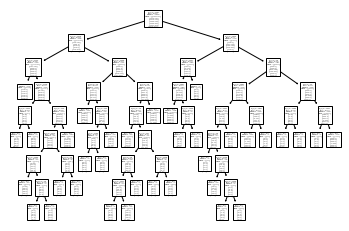

In [ ]:
# visualize your tree
tree.plot_tree(classifier);

In [ ]:
# check the hyperparameters used
classifier.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# check your tree's depth
classifier.get_depth()

8

**Awesome progress if you've come this far! **

Extra credit - Why don't we play with the hyperparameters we discussed earlier to see how our model changes?

check the documentation and choose the hyperparameters you like: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
# initialize your classifier again but this time with the hyperparamers you want
# initilize the classifier
classifier2 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=15,min_samples_split=20)
# fit your classifier to the data using the .fit() method
classifier2.fit(X_train,y_train)
# predict train set values
ypredtrain=classifier2.predict(X_train)
# predict test set values
ypredtest=classifier2.predict(X_test)


In [ ]:
# check accuracy on training set
train_accuracy2=accuracy_score(ypredtrain,y_train)
print(train_accuracy2)
# check accuracy on testing set
test_accuracy2=accuracy_score(ypredtest,y_test)
print(test_accuracy2)

0.9766266582438408
0.9640151515151515


In [ ]:
# check accuracy on training set
# check accuracy on testing set

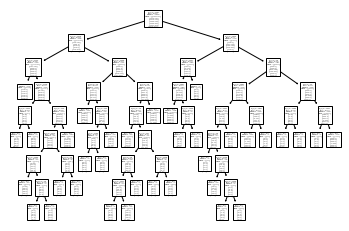

In [ ]:
# visualize your tree
import matplotlib.pyplot as plt
tree.plot_tree(classifier);
plt.savefig('treenew.png',format='png',bbox_inches = "tight",dpi=1000)

Reflect on your results - let's discuss!